# AI based approach to Pediatric self-screening diagnostic - Proof of Concept
1. Support user natural langugae description of child's symptoms 
2. mapped to standard set of symptoms (reverse asymmetric semantic search using transformer model)
3. symptoms disease prediction model
4. to be further enhanced with iterative data gathering and diagnostic process

In [1]:
import numpy as np 
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth', 0)

# disease prediction model
- based on sample data set https://www.kaggle.com/datasets/itachi9604/disease-symptom-description-dataset

## get data and list of symptoms

In [2]:
df = pd.read_csv('dataset.csv')
df.columns = df.columns.str.lower()
print(df.shape)
df.head(10)

(4920, 18)


,disease,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,symptom_6,symptom_7,symptom_8,symptom_9,symptom_10,symptom_11,symptom_12,symptom_13,symptom_14,symptom_15,symptom_16,symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# get all symptom columns
symp_cols = df[df.columns[1:]].columns
symp_cols

Index(['symptom_1', 'symptom_2', 'symptom_3', 'symptom_4', 'symptom_5',
       'symptom_6', 'symptom_7', 'symptom_8', 'symptom_9', 'symptom_10',
       'symptom_11', 'symptom_12', 'symptom_13', 'symptom_14', 'symptom_15',
       'symptom_16', 'symptom_17'],
      dtype='object')

In [4]:
# get values for each symptom
values = []
for col in symp_cols :
    values = values + list(df[symp_cols[0]].values) # won't include NaN
    
print(len(values))
values

83640


['itching',
 ' skin_rash',
 'itching',
 'itching',
 'itching',
 ' skin_rash',
 'itching',
 'itching',
 'itching',
 'itching',
 ' continuous_sneezing',
 ' shivering',
 ' continuous_sneezing',
 ' continuous_sneezing',
 ' continuous_sneezing',
 ' shivering',
 ' continuous_sneezing',
 ' continuous_sneezing',
 ' continuous_sneezing',
 ' continuous_sneezing',
 ' stomach_pain',
 ' stomach_pain',
 ' stomach_pain',
 ' stomach_pain',
 ' stomach_pain',
 ' stomach_pain',
 ' acidity',
 ' stomach_pain',
 ' stomach_pain',
 ' stomach_pain',
 'itching',
 ' vomiting',
 'itching',
 'itching',
 'itching',
 'itching',
 'itching',
 'itching',
 'itching',
 'itching',
 'itching',
 'itching',
 'itching',
 'itching',
 'itching',
 ' skin_rash',
 'itching',
 'itching',
 'itching',
 'itching',
 ' vomiting',
 ' vomiting',
 ' indigestion',
 ' vomiting',
 ' vomiting',
 ' vomiting',
 ' vomiting',
 ' vomiting',
 ' vomiting',
 ' vomiting',
 ' muscle_wasting',
 ' patches_in_throat',
 ' muscle_wasting',
 ' muscle_wasting'

In [5]:
symptom_counter = Counter(values)
symptom_counter

Counter({'itching': 11526,
         ' skin_rash': 8160,
         ' continuous_sneezing': 3774,
         ' shivering': 204,
         ' stomach_pain': 1938,
         ' acidity': 2040,
         ' vomiting': 13974,
         ' indigestion': 204,
         ' muscle_wasting': 1836,
         ' patches_in_throat': 204,
         ' fatigue': 11730,
         ' weight_loss': 102,
         ' sunken_eyes': 204,
         ' cough': 204,
         ' headache': 2142,
         ' chest_pain': 204,
         ' back_pain': 1836,
         ' weakness_in_limbs': 204,
         ' chills': 8058,
         ' joint_pain': 7854,
         ' yellowish_skin': 204,
         ' constipation': 1938,
         ' pain_during_bowel_movements': 102,
         ' breathlessness': 204,
         ' cramps': 102,
         ' weight_gain': 204,
         ' mood_swings': 102,
         ' neck_pain': 102,
         ' muscle_weakness': 1938,
         ' stiff_neck': 102,
         ' pus_filled_pimples': 102,
         ' burning_micturition': 1836,
  

<AxesSubplot:>

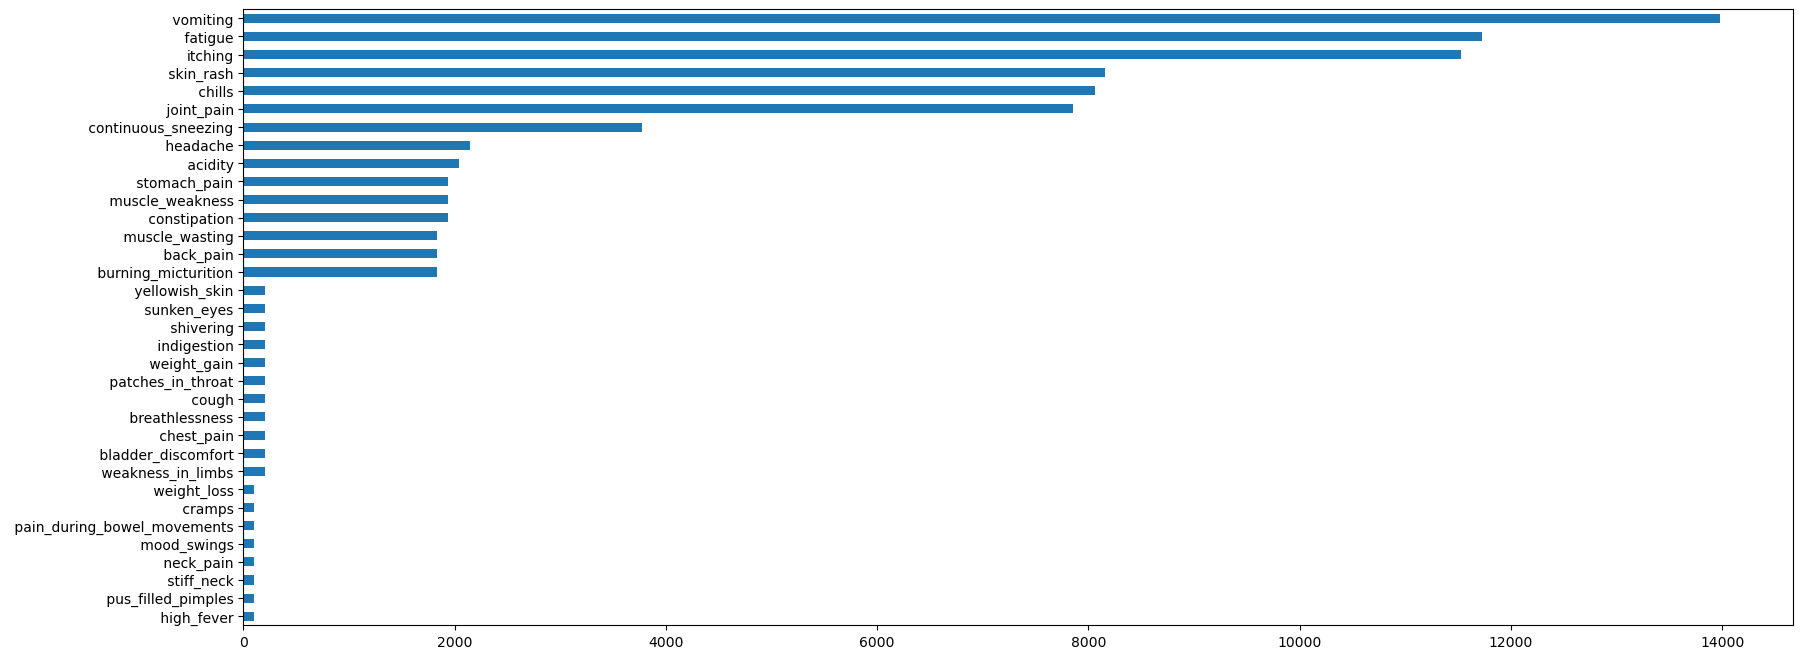

In [6]:
symptoms_count = pd.Series(dict(symptom_counter))
symptoms_count.sort_values(ascending=True).plot(kind='barh',figsize=(20,8))

In [7]:
# a list of unique symptoms
symptoms = symptoms_count.index.tolist()
symptoms

['itching',
 ' skin_rash',
 ' continuous_sneezing',
 ' shivering',
 ' stomach_pain',
 ' acidity',
 ' vomiting',
 ' indigestion',
 ' muscle_wasting',
 ' patches_in_throat',
 ' fatigue',
 ' weight_loss',
 ' sunken_eyes',
 ' cough',
 ' headache',
 ' chest_pain',
 ' back_pain',
 ' weakness_in_limbs',
 ' chills',
 ' joint_pain',
 ' yellowish_skin',
 ' constipation',
 ' pain_during_bowel_movements',
 ' breathlessness',
 ' cramps',
 ' weight_gain',
 ' mood_swings',
 ' neck_pain',
 ' muscle_weakness',
 ' stiff_neck',
 ' pus_filled_pimples',
 ' burning_micturition',
 ' bladder_discomfort',
 ' high_fever']

## prepare/encode training data for symptom-disease prediction model

In [8]:
df1 = df.fillna('')
df1

,disease,symptom_1,symptom_2,symptom_3,symptom_4,symptom_5,symptom_6,symptom_7,symptom_8,symptom_9,symptom_10,symptom_11,symptom_12,symptom_13,symptom_14,symptom_15,symptom_16,symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,,,,,,,,,,,,,
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,,,,,,,,,,,,,,
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,,,,,,,,,,,,,,
3,Fungal infection,itching,skin_rash,dischromic _patches,,,,,,,,,,,,,,
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,,,,,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements,loss_of_balance,unsteadiness,,,,,,,,,,,
4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,,,,,,,,,,,,,
4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine,,,,,,,,,,,,,
4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,,,,,,,,,,,


In [9]:
# combine all into one feature column, apply lambda by row with axis=1!
df1["symptoms"] = df1.drop(['disease'],axis=1).apply(lambda x: ','.join(x.values.tolist()), axis=1) #tolist inserts space?
df1["symptoms"]

0       itching, skin_rash, nodal_skin_eruptions, dischromic _patches,,,,,,,,,,,,,                                    
1        skin_rash, nodal_skin_eruptions, dischromic _patches,,,,,,,,,,,,,,                                           
2       itching, nodal_skin_eruptions, dischromic _patches,,,,,,,,,,,,,,                                              
3       itching, skin_rash, dischromic _patches,,,,,,,,,,,,,,                                                         
4       itching, skin_rash, nodal_skin_eruptions,,,,,,,,,,,,,,                                                        
                                 ...                                                                                  
4915     vomiting, headache, nausea, spinning_movements, loss_of_balance, unsteadiness,,,,,,,,,,,                     
4916     skin_rash, pus_filled_pimples, blackheads, scurring,,,,,,,,,,,,,                                             
4917     burning_micturition, bladder_discomfort

In [10]:
df1 = df1[["disease","symptoms"]]
df1

,disease,symptoms
0,Fungal infection,"itching, skin_rash, nodal_skin_eruptions, dischromic _patches,,,,,,,,,,,,,"
1,Fungal infection,"skin_rash, nodal_skin_eruptions, dischromic _patches,,,,,,,,,,,,,,"
2,Fungal infection,"itching, nodal_skin_eruptions, dischromic _patches,,,,,,,,,,,,,,"
3,Fungal infection,"itching, skin_rash, dischromic _patches,,,,,,,,,,,,,,"
4,Fungal infection,"itching, skin_rash, nodal_skin_eruptions,,,,,,,,,,,,,,"
...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,"vomiting, headache, nausea, spinning_movements, loss_of_balance, unsteadiness,,,,,,,,,,,"
4916,Acne,"skin_rash, pus_filled_pimples, blackheads, scurring,,,,,,,,,,,,,"
4917,Urinary tract infection,"burning_micturition, bladder_discomfort, foul_smell_of urine, continuous_feel_of_urine,,,,,,,,,,,,,"
4918,Psoriasis,"skin_rash, joint_pain, skin_peeling, silver_like_dusting, small_dents_in_nails, inflammatory_nails,,,,,,,,,,,"


In [11]:
train_df = df1.copy()
for symptom in symptoms:
    train_df[symptom] = train_df["symptoms"].apply(lambda x : 1 if symptom in x else 0)

train_df.drop(["symptoms"],inplace=True,axis=1)

In [12]:
train_df

,disease,itching,skin_rash,continuous_sneezing,shivering,stomach_pain,acidity,vomiting,indigestion,muscle_wasting,...,cramps,weight_gain,mood_swings,neck_pain,muscle_weakness,stiff_neck,pus_filled_pimples,burning_micturition,bladder_discomfort,high_fever
0,Fungal infection,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,Acne,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4917,Urinary tract infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4918,Psoriasis,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## train model

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [14]:
y = train_df["disease"]
x = train_df.drop(['disease'],axis=1)

In [15]:
#
from lightgbm import LGBMClassifier
classification_model = LGBMClassifier()
scores = cross_val_score(classification_model,x,y,cv=5,scoring='accuracy')
print(scores.mean(),scores.std())

0.9510162601626015 0.02290894764813881


In [16]:
# train model with full data
classification_model.fit(x,y)

LGBMClassifier()

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True, random_state=42,stratify=y)

In [37]:
# Try train with a number of algorithms
models=[]
models.append(('X=LGBClassifier',LGBMClassifier()))
models.append(('LogisticRegression',LogisticRegression()))
models.append(('RandomForestClassifier',RandomForestClassifier()))
#models.append(('XGBClassifier',xgb))

In [41]:
Model=[]
score=[]
cv=[]

for name,model in models:
    print('*****************',name,'*******************')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    AS=accuracy_score
    AS=accuracy_score(y_test,pre)
    #print('Accuracy_score :',AS)
    score.append(AS*100)
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Model', model,'CV accuracy score :',sc)
    cv.append(sc*100)       
    print('classification report :\n\n',classification_report(y_test,pre))
    #cm=confusion_matrix(y_test,pre)

#result=pd.DataFrame({'Model':Model,'Accuracy_score with CV':cv})
#result

***************** X=LGBClassifier *******************
LGBMClassifier()
Model LGBMClassifier() CV accuracy score : 0.9510162601626018
classification report :

                                          precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.53      0.88      0.66        24
                                   AIDS       1.00      1.00      1.00        24
                                   Acne       1.00      0.92      0.96        24
                    Alcoholic hepatitis       0.83      0.79      0.81        24
                                Allergy       1.00      1.00      1.00        24
                              Arthritis       1.00      1.00      1.00        24
                       Bronchial Asthma       1.00      1.00      1.00        24
                   Cervical spondylosis       1.00      1.00      1.00        24
                            Chicken pox       1.00      1.00      1.00        24
                    Chronic ch

# query model
- predict function

In [ ]:
# symptom activation by semantic match

In [22]:
# load transformer model for Asymmetric Semantic Search
from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('msmarco-distilbert-base-v4')

In [23]:
# generate embeddings for review 
#reviews_selected_list = reviews_selected['comments'].fillna('').values.tolist()
symptom_embedding = model.encode(symptoms)
print("symptoms embedding size:", symptom_embedding.shape)

symptoms embedding size: (34, 768)


In [24]:
symptom_embedding.shape

(34, 768)

In [25]:
# Sample query
query_embedding = model.encode('skin rash and itching')
query_embedding.shape

(768,)

In [26]:
# sematic match of symptoms and query
print('compare query with each symptom...')
symptom_query_match = util.semantic_search(symptom_embedding, query_embedding)
symptom_query_match

compare query with each symptom...


[[{'corpus_id': 0, 'score': 0.7768627405166626}],
 [{'corpus_id': 0, 'score': 0.7732645273208618}],
 [{'corpus_id': 0, 'score': 0.17808741331100464}],
 [{'corpus_id': 0, 'score': 0.26186007261276245}],
 [{'corpus_id': 0, 'score': 0.0962730348110199}],
 [{'corpus_id': 0, 'score': 0.08476472645998001}],
 [{'corpus_id': 0, 'score': 0.18771687150001526}],
 [{'corpus_id': 0, 'score': 0.13068707287311554}],
 [{'corpus_id': 0, 'score': 0.010801892727613449}],
 [{'corpus_id': 0, 'score': 0.1801987588405609}],
 [{'corpus_id': 0, 'score': 0.019858315587043762}],
 [{'corpus_id': 0, 'score': -0.008142281323671341}],
 [{'corpus_id': 0, 'score': 0.04554012790322304}],
 [{'corpus_id': 0, 'score': 0.15165238082408905}],
 [{'corpus_id': 0, 'score': 0.18563280999660492}],
 [{'corpus_id': 0, 'score': 0.06239389628171921}],
 [{'corpus_id': 0, 'score': 0.14877775311470032}],
 [{'corpus_id': 0, 'score': 0.07847414910793304}],
 [{'corpus_id': 0, 'score': 0.1917213499546051}],
 [{'corpus_id': 0, 'score': 0.10

In [27]:
pd.DataFrame(symptom_query_match)

,0
0,"{'corpus_id': 0, 'score': 0.7768627405166626}"
1,"{'corpus_id': 0, 'score': 0.7732645273208618}"
2,"{'corpus_id': 0, 'score': 0.17808741331100464}"
3,"{'corpus_id': 0, 'score': 0.26186007261276245}"
4,"{'corpus_id': 0, 'score': 0.0962730348110199}"
5,"{'corpus_id': 0, 'score': 0.08476472645998001}"
6,"{'corpus_id': 0, 'score': 0.18771687150001526}"
7,"{'corpus_id': 0, 'score': 0.13068707287311554}"
8,"{'corpus_id': 0, 'score': 0.010801892727613449}"
9,"{'corpus_id': 0, 'score': 0.1801987588405609}"


In [28]:
pd.DataFrame(symptom_query_match[0])

,corpus_id,score
0,0,0.776863


In [29]:
# must turn each row into a list before converting 
symptom_score = pd.DataFrame(symptom_query_match).apply(lambda x: pd.DataFrame(x.tolist())['score'])
symptom_score

,0
0,0.776863
1,0.773265
2,0.178087
3,0.261860
4,0.096273
5,0.084765
6,0.187717
7,0.130687
8,0.010802
9,0.180199


In [30]:
# turn into binary features
query_symptoms = symptom_score.apply(lambda x: 1 if x[0]>0.4 else 0, axis=1)
query_symptoms

0     1
1     1
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    1
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
dtype: int64

In [31]:
# turn match into a row
pred_disease = classification_model.predict(pd.DataFrame(query_symptoms).T)

In [32]:
pred_disease

array(['Fungal infection'], dtype=object)

In [33]:
pred_disease[0]

'Fungal infection'

In [34]:
symp_desc = pd.read_csv('symptom_description.csv')
symp_desc.head()

,Disease,Description
0,Drug Reaction,An adverse drug reaction (ADR) is an injury caused by taking medication. ADRs may occur following a single dose or prolonged administration of a drug or result from the combination of two or more drugs.
1,Malaria,An infectious disease caused by protozoan parasites from the Plasmodium family that can be transmitted by the bite of the Anopheles mosquito or by a contaminated needle or transfusion. Falciparum malaria is the most deadly type.
2,Allergy,"An allergy is an immune system response to a foreign substance that's not typically harmful to your body.They can include certain foods, pollen, or pet dander. Your immune system's job is to keep you healthy by fighting harmful pathogens."
3,Hypothyroidism,"Hypothyroidism, also called underactive thyroid or low thyroid, is a disorder of the endocrine system in which the thyroid gland does not produce enough thyroid hormone."
4,Psoriasis,"Psoriasis is a common skin disorder that forms thick, red, bumpy patches covered with silvery scales. They can pop up anywhere, but most appear on the scalp, elbows, knees, and lower back. Psoriasis can't be passed from person to person. It does sometimes happen in members of the same family."


In [35]:
symp_precaution = pd.read_csv('symptom_precaution.csv')
symp_precaution.head()

,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,Allergy,apply calamine,cover area with bandage,NaN,use ice to compress itching
3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths


In [36]:

predicted_disease = pred_disease[0]
disease_info = pd.merge(symp_desc, symp_precaution, on='Disease')
predicted_disease_info = disease_info[disease_info['Disease']==predicted_disease]
predicted_disease_info

,Disease,Description,Precaution_1,Precaution_2,Precaution_3,Precaution_4
24,Fungal infection,"In humans, fungal infections occur when an invading fungus takes over an area of the body and is too much for the immune system to handle. Fungi can live in the air, soil, water, and plants. There are also some fungi that live naturally in the human body. Like many microbes, there are helpful fungi and harmful fungi.",bath twice,use detol or neem in bathing water,keep infected area dry,use clean cloths
